## Exploring Renovation Potentials: Data-Driven Insights for Renovation Service Providers in Chemnitz

Matrnr.: 8161859, 

### .-1 Setup requirements

- Python version 3.9.18

In [964]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### 0. Preprocessing

In [965]:
import pandas as pd

In [966]:
def readCsv(path):
    return pd.read_csv(path)
raw_immo_data = readCsv('./immo_data.csv')

Notes:
- The dataset contains different datatypes but also using whitespraces with "_" but also common whitespaces.
- There are many values with NaN
- Some datafields say NO_Information which is probably similar to NaN?

In [967]:
def extractColumnsFromDataset(dataset):
    filtered = dataset[['regio1', 'newlyConst', 'balcony', 'totalRent', 'yearConstructed', 'hasKitchen', 'baseRent', 'livingSpace', 'condition', 'interiorQual', 'petsAllowed','noRooms', 'thermalChar', 'regio2', 'regio3', 'lastRefurbish', 'date']]
    return filtered

extracted_immo_data = extractColumnsFromDataset(raw_immo_data)
extracted_immo_data.shape

(268850, 17)

In [968]:
def filterRegioForChemnitz(datset):
    chemnitz_rows = datset[datset['regio2'] == 'Chemnitz']
    return chemnitz_rows

chemnitz_rows = filterRegioForChemnitz(extracted_immo_data)
chemnitz_rows.shape

(12575, 17)

In [969]:
def saveToCsv(dataset, title):
    dataset.to_csv(title+'.csv', sep="\t", index=False)

saveToCsv(chemnitz_rows, "outData")

In [970]:
chemnitz_in = pd.read_csv('./outData.csv', delimiter="\t")
chemnitz_in.shape
chemnitz_in

,regio1,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,petsAllowed,noRooms,thermalChar,regio2,regio3,lastRefurbish,date
0,Sachsen,False,True,307.00,1930.0,False,219.00,40.20,NaN,normal,NaN,2.0,123.0,Chemnitz,Sonnenberg,NaN,Oct19
1,Sachsen,False,True,501.00,NaN,False,340.00,65.00,fully_renovated,normal,yes,3.0,NaN,Chemnitz,Lutherviertel,NaN,Oct19
2,Sachsen,False,True,425.00,1909.0,True,280.00,53.12,well_kept,normal,negotiable,2.0,153.0,Chemnitz,Bernsdorf,2014.0,Feb20
3,Sachsen,False,True,760.00,1998.0,True,560.00,115.00,NaN,NaN,NaN,5.0,NaN,Chemnitz,Sonnenberg,2000.0,Oct19
4,Sachsen,False,False,715.00,1920.0,False,515.00,102.30,well_kept,NaN,NaN,3.0,NaN,Chemnitz,Zentrum,1995.0,Oct19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,Sachsen,False,False,293.00,1895.0,False,198.00,43.00,NaN,normal,NaN,2.0,96.0,Chemnitz,Kappel,NaN,Feb20
12571,Sachsen,False,True,444.00,NaN,False,314.00,59.00,fully_renovated,sophisticated,negotiable,2.0,NaN,Chemnitz,Schloßchemnitz,NaN,May19
12572,Sachsen,True,True,799.88,2018.0,False,611.88,91.13,refurbished,sophisticated,negotiable,3.0,NaN,Chemnitz,Gablenz,2018.0,May19
12573,Sachsen,False,True,326.00,NaN,False,222.00,47.34,fully_renovated,normal,negotiable,1.0,NaN,Chemnitz,Kaßberg,NaN,May19


### 1. Business Understanding

Wir sind eine Renovierungsfirma die weiter im Raum Chemnitz expandieren möchte. Momentan sind wir auf Renovierungen im Innenbereich spezialisiert. Um einen größeren Leistungsumfang anzubieten und mehr Umsatz zu generieren steht die Frage im Raum, ob eine zusätzliche Spezialisierung auf Renovierungen im Außenbereich sinnvoll ist.

Erfahrungsgemäß: 
- Umfassende Sanierungen (80.000 €) sind bei Wohnungen älter als 40 Jahre nötig 
- Kleine Sanierungen (15.000 €) seit Renovierungsarbeit länger als 10 Jahre her

Frage:
- Mit wieviel zusätzlichem Umsatz kann gerechnet werden?

Daher unsere Kernfragen:
1. Lohnt es Experte für Renovierungen im Außenbereich zu werden?
- Sind Wohnungen mit Balkon teuer (total rent) und sind diese über 40 jahre alt und nicht vor 10 Jahren renoviert
- Ist in nächsten fünf Jahren mit großen Renovierungsarbeiten im Außenbereich zu rechnen? Vergleichen von Wohnungen nur mit Innenbereich

Beispielhafte Antwort:
- Von 12.000 Wohnungen benötigen in den nächsten fünf Jahren 5 Prozent umfassende Renovierungen und 15 Prozent kleinere Sanierungen. Lediglich 1 Prozent der umfassenden Renovierungen haben einen Balkon und nur 3 Prozent der kleinen. Generell haben Wohnungen mit Außenbereich 30 Prozent höhere Mieten.
- Es macht daher keinen Sinn umfassende Investitionen in den Außenbereich zu tätigen 

Data Understanding:
- Welche Daten liegen vor?
- Wie sehen diese aus? Könnte es Probleme mit den Daten geben?
- Kann man »auf den ersten Blick« bereits Zusammenhänge erkennen?
- Wie könnten beispielhafte Antworten oder Ergebnisse aussehen?

Data Preperation:
- Können die Daten in der vorliegenden Form
verwendet werden? (meistens: nein)
- Wie können diese vorverarbeitet werden, um sie zu verwenden?

Modelling:
- Welche Verfahren lösen mein Problem?
- Wie kann man die Verfahren verbessern?
- Welche Alternativen gibt es?
- Achtung: Es gibt unter Umständen einen (sehr starken) Zusammenhang mit Data Preparation -> Iterationszyklen

Evaluation:
- Welches Verfahren ist am Besten?
- Beantwortet es die Fragen aus dem Geschäftsverstehen?

Deployment:
- Wie können die Ergebnisse präsentiert
werden?
- Wie können die Ergebnisse integriert werden?

### 2. Data Exploration und Analyse

#### 2.1 Erste Analyse und Betrachtung

In [971]:
# Header der Daten
chemnitz_in.columns

Index(['regio1', 'newlyConst', 'balcony', 'totalRent', 'yearConstructed',
       'hasKitchen', 'baseRent', 'livingSpace', 'condition', 'interiorQual',
       'petsAllowed', 'noRooms', 'thermalChar', 'regio2', 'regio3',
       'lastRefurbish', 'date'],
      dtype='object')

In [972]:
# Größe der Datentabelle
chemnitz_in.shape

(12575, 17)

In [973]:
# Übersicht über die Daten und deren Datentypen
chemnitz_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   regio1           12575 non-null  object 
 1   newlyConst       12575 non-null  bool   
 2   balcony          12575 non-null  bool   
 3   totalRent        11388 non-null  float64
 4   yearConstructed  8811 non-null   float64
 5   hasKitchen       12575 non-null  bool   
 6   baseRent         12575 non-null  float64
 7   livingSpace      12575 non-null  float64
 8   condition        9805 non-null   object 
 9   interiorQual     7079 non-null   object 
 10  petsAllowed      8302 non-null   object 
 11  noRooms          12575 non-null  float64
 12  thermalChar      8351 non-null   float64
 13  regio2           12575 non-null  object 
 14  regio3           12575 non-null  object 
 15  lastRefurbish    2826 non-null   float64
 16  date             12575 non-null  object 
dtypes: bool(3), 

In [974]:
# Stichprobe 60-sten Datensatz aus der Liste
chemnitz_in.iloc[60]
# Beispielsweise sind in dieser Stichprobe einige Werte nicht sinnvoll:
# - lastRefurbish hat einen NaN-Wert
# - Date ist kein sinvoll verwendbares Datum
# - yearConstructed ist in Datentyp Float

regio1                    Sachsen
newlyConst                  False
balcony                     False
totalRent                   313.8
yearConstructed            1996.0
hasKitchen                   True
baseRent                    209.2
livingSpace                 46.49
condition               well_kept
interiorQual               normal
petsAllowed            negotiable
noRooms                       1.0
thermalChar                  82.8
regio2                   Chemnitz
regio3             Schloßchemnitz
lastRefurbish                 NaN
date                        Sep18
Name: 60, dtype: object

In [975]:
chemnitz_in[['regio1', "totalRent"]]

,regio1,totalRent
0,Sachsen,307.00
1,Sachsen,501.00
2,Sachsen,425.00
3,Sachsen,760.00
4,Sachsen,715.00
...,...,...
12570,Sachsen,293.00
12571,Sachsen,444.00
12572,Sachsen,799.88
12573,Sachsen,326.00


In [976]:
# Hier fällt auf, das Total Rent eine Range von 0.0 bis NaN hat.
chemnitz_in.sort_values('totalRent')

,regio1,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,petsAllowed,noRooms,thermalChar,regio2,regio3,lastRefurbish,date
6108,Sachsen,False,False,0.0,1910.0,True,0.0,62.00,well_kept,normal,negotiable,2.0,105.3,Chemnitz,Sonnenberg,1995.0,May19
10005,Sachsen,False,True,0.0,1925.0,False,275.0,54.20,NaN,NaN,NaN,2.0,116.3,Chemnitz,Sonnenberg,NaN,Sep18
6359,Sachsen,False,False,0.0,1900.0,False,230.0,41.10,NaN,NaN,NaN,2.0,NaN,Chemnitz,Bernsdorf,NaN,May19
4109,Sachsen,False,True,0.0,NaN,False,0.0,95.10,NaN,NaN,NaN,2.0,NaN,Chemnitz,Hutholz,NaN,Oct19
11463,Sachsen,False,True,1.0,NaN,False,459.0,70.60,first_time_use_after_refurbishment,sophisticated,negotiable,3.0,NaN,Chemnitz,Zentrum,2018.0,May19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12475,Sachsen,False,True,NaN,1900.0,False,335.0,67.00,well_kept,normal,NaN,2.0,110.8,Chemnitz,Lutherviertel,1996.0,Sep18
12507,Sachsen,False,False,NaN,1900.0,False,370.0,74.00,mint_condition,NaN,NaN,3.0,126.0,Chemnitz,Gablenz,1995.0,May19
12515,Sachsen,False,False,NaN,1915.0,False,243.0,52.80,fully_renovated,NaN,negotiable,2.0,102.0,Chemnitz,Siegmar,NaN,May19
12525,Sachsen,False,True,NaN,1985.0,False,256.0,51.15,refurbished,NaN,negotiable,2.0,65.0,Chemnitz,Reichenbrand,NaN,Feb20


In [977]:
# Describe ergibt hier wenig sinn, da die Tabelle noch nicht aufbereitet ist.
# Es ist aber klar, dass eine totalRent von 0 nicht sinnvoll ist
# Zudem ist unklar, was noRooms aussagt.
chemnitz_in.describe()

,totalRent,yearConstructed,baseRent,livingSpace,noRooms,thermalChar,lastRefurbish
count,11388.000000,8811.000000,12575.000000,12575.000000,12575.000000,8351.000000,2826.000000
mean,458.504498,1935.814323,325.567874,62.503412,2.496619,104.832891,2007.629866
std,190.452234,35.971830,149.273900,25.842287,8.936825,57.348972,10.050789
min,0.000000,1862.000000,0.000000,0.000000,1.000000,18.000000,1900.000000
25%,350.000000,1908.000000,245.000000,49.560000,2.000000,84.380000,1998.000000
50%,420.000000,1920.000000,295.000000,59.030000,2.000000,100.000000,2010.000000
75%,500.000000,1968.000000,357.000000,70.000000,3.000000,117.365000,2018.000000
max,2536.000000,2020.000000,2072.000000,1717.740000,999.990000,1983.000000,2021.000000


In [978]:
# Alle Zeilen mit NaNs löschen:
#chemnitz_in.dropna(axis = 0)
# Nur 955 Zeilen besitzen keine NaN Werte

In [979]:
# Alle Spalten mit NaNs löschen:
#chemnitz_in.dropna(axis = 1)
# 10 Spalten besitzen keine NaN Werte, aber 7 schon
chemnitz_in.shape

(12575, 17)

#### Erste Erkenntnisse

- Datensatz hat 12575 Einträge mit 17 Spalten davon
- besitzen 10 Spalten besitzen keine NaN Werte, aber 7 und
- nur 955 Zeilen besitzen keine NaN Werte.
- Zudem haben die Spalten teilweise "falsche" Datentypen

#### 2.2 Analyse der nicht numerischen Spalten

In [980]:
import matplotlib.pyplot as plt

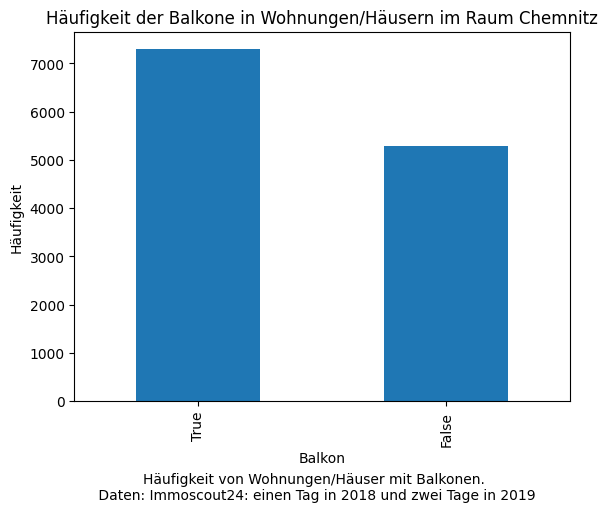

In [981]:
balcony = chemnitz_in['balcony'].value_counts()

balcony.plot(kind='bar')
plt.title('Häufigkeit der Balkone in Wohnungen/Häusern im Raum Chemnitz')
plt.xlabel('Balkon')
plt.ylabel('Häufigkeit')

plt.figtext(0.5, -0.1, 'Häufigkeit von Wohnungen/Häuser mit Balkonen.\n Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019', ha='center', va='bottom')
plt.show()

In [982]:
# Anteil der Wohnuungen/Häuser mit Balkonen
total_count = len(chemnitz_in)
balcony_count = chemnitz_in['balcony'].sum()
percentage_with_balcony = (balcony_count / total_count) * 100
print(f"Der Anteil von Wohnungen/Häusern mit Balkonen beträgt {percentage_with_balcony:.2f}%.")

Der Anteil von Wohnungen/Häusern mit Balkonen beträgt 57.99%.


In [983]:
# Kontrolle des Datensatzes
chemnitz_in.shape

(12575, 17)

#### 2.3 Numerische Spalten

##### Boxplot

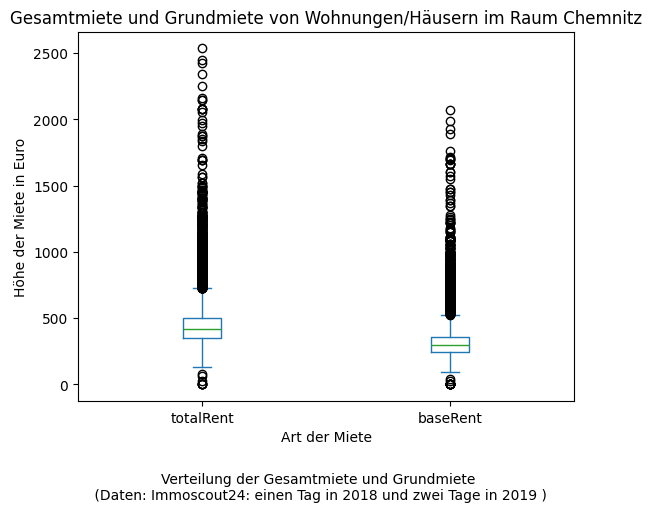

In [984]:
rent = ["totalRent", "baseRent"]

boxplot = chemnitz_in[rent].plot(kind="box")

plt.title('Gesamtmiete und Grundmiete von Wohnungen/Häusern im Raum Chemnitz')
plt.xlabel('Art der Miete')
plt.ylabel('Höhe der Miete in Euro')

plt.figtext(0.5, -0.1, 'Verteilung der Gesamtmiete und Grundmiete\n (Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019 )', ha='center', va='bottom')
plt.show()

In [985]:
# Kontrolle des Datensatzes
chemnitz_in.shape

(12575, 17)

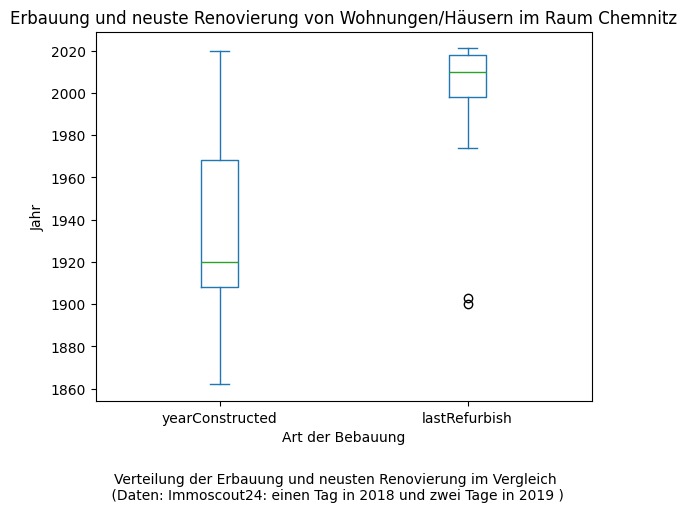

In [986]:
construction_site = ["yearConstructed", "lastRefurbish"]
chemnitz_in[construction_site].plot(kind="box")

plt.title('Erbauung und neuste Renovierung von Wohnungen/Häusern im Raum Chemnitz')
plt.xlabel('Art der Bebauung')
plt.ylabel('Jahr')

plt.figtext(0.5, -0.1, 'Verteilung der Erbauung und neusten Renovierung im Vergleich\n (Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019 )', ha='center', va='bottom')
plt.show()

In [987]:
# Kontrolle des Datensatzes
chemnitz_in.shape

(12575, 17)

In [988]:
quantile_25_construction_year = chemnitz_in["yearConstructed"].quantile(0.25)
quantile_75_construction_year = chemnitz_in["yearConstructed"].quantile(0.75)
quantile_25_last_refurbish = chemnitz_in["lastRefurbish"].quantile(0.25)
quantile_75_last_refurbish = chemnitz_in["lastRefurbish"].quantile(0.75)

print(f"Das 0,25-Quantil (Q1) des Baujahres beträgt: {quantile_25_construction_year}")
print(f"Das 0,75-Quantil (Q3) des Baujahres beträgt: {quantile_75_construction_year}")

print(f"Das 0,75-Quantil (Q3) der letzten Renovierung beträgt: {quantile_75_last_refurbish}")
print(f"Das 0,25-Quantil (Q1) der letzten Renovierung beträgt: {quantile_25_last_refurbish}")

Das 0,25-Quantil (Q1) des Baujahres beträgt: 1908.0
Das 0,75-Quantil (Q3) des Baujahres beträgt: 1968.0
Das 0,75-Quantil (Q3) der letzten Renovierung beträgt: 2018.0
Das 0,25-Quantil (Q1) der letzten Renovierung beträgt: 1998.0


In [989]:
count_thermal_char_more_than_1000 = chemnitz_in.loc[(chemnitz_in['thermalChar'] > 1000)]
count_thermal_char_more_than_1000["thermalChar"].count()

7

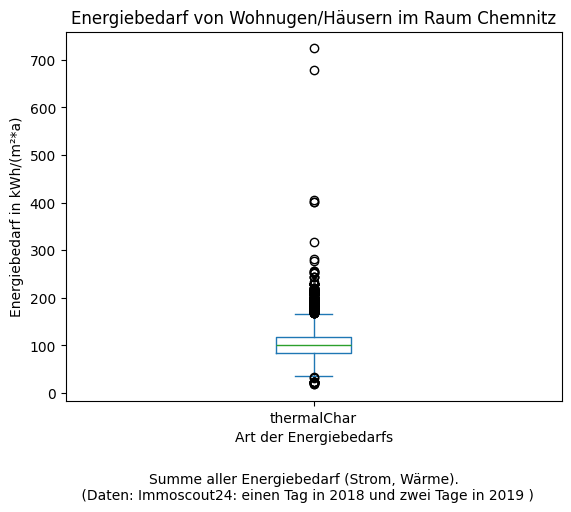

In [990]:
chemnitz_in = chemnitz_in.loc[(chemnitz_in['thermalChar'] <= 1000) | (chemnitz_in['thermalChar'].isna())]
chemnitz_in["thermalChar"].plot(kind="box")

plt.title('Energiebedarf von Wohnugen/Häusern im Raum Chemnitz')
plt.xlabel('Art der Energiebedarfs')
plt.ylabel('Energiebedarf in kWh/(m²*a)')

plt.figtext(0.5, -0.1, 'Summe aller Energiebedarf (Strom, Wärme). \n (Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019 )', ha='center', va='bottom')
plt.show()

In [991]:
chemnitz_in.shape

(12568, 17)

In [992]:
count_rooms_more_then_10 = chemnitz_in.loc[(chemnitz_in['noRooms'] > 10)]
count_rooms_more_then_10["noRooms"].count()

1

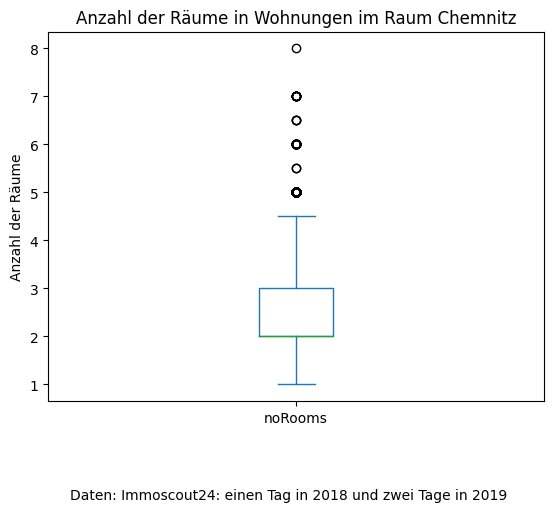

In [993]:
# Entfernen von Wohnugen/Häusern mit mehr als 10 Räumen.
# In der Regel haben Wohnungen/Häuser nicht mehr als 100 Räume
# Ausnahme ist beispielsweise das Schloss Schönbrunn mit 1.441 Räumen (Google)
chemnitz_in = chemnitz_in.loc[(chemnitz_in['noRooms'] <= 10) | (chemnitz_in['noRooms'].isna())]
chemnitz_in["noRooms"].plot(kind="box")

plt.title('Anzahl der Räume in Wohnungen im Raum Chemnitz')
plt.ylabel('Anzahl der Räume')

plt.figtext(0.5, -0.1, 'Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019', ha='center', va='bottom')
plt.show()

In [994]:
count_living_space_more_than_1000 = chemnitz_in.loc[(chemnitz_in['livingSpace'] > 1000)]
count_living_space_more_than_1000["livingSpace"].count()

1

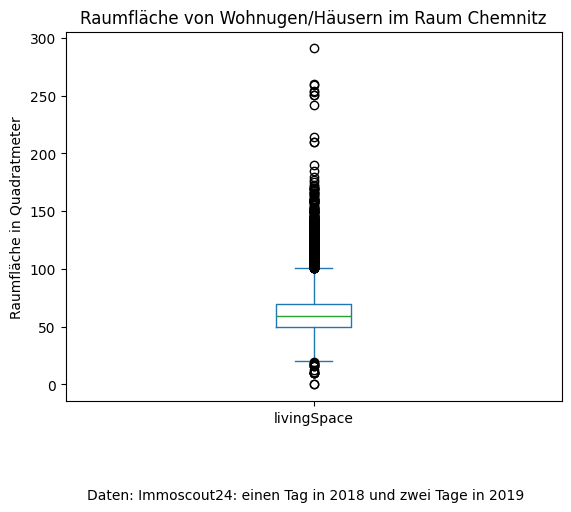

In [995]:
chemnitz_in = chemnitz_in.loc[(chemnitz_in['livingSpace'] <= 1000) | (chemnitz_in['livingSpace'].isna())]
chemnitz_in["livingSpace"].plot(kind="box")

plt.title('Raumfläche von Wohnugen/Häusern im Raum Chemnitz')
plt.ylabel('Raumfläche in Quadratmeter')

plt.figtext(0.5, -0.1, 'Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019', ha='center', va='bottom')
plt.show()

In [996]:
# Kontrolle des Datensatzes
chemnitz_in.shape

(12566, 17)

##### Histogramme

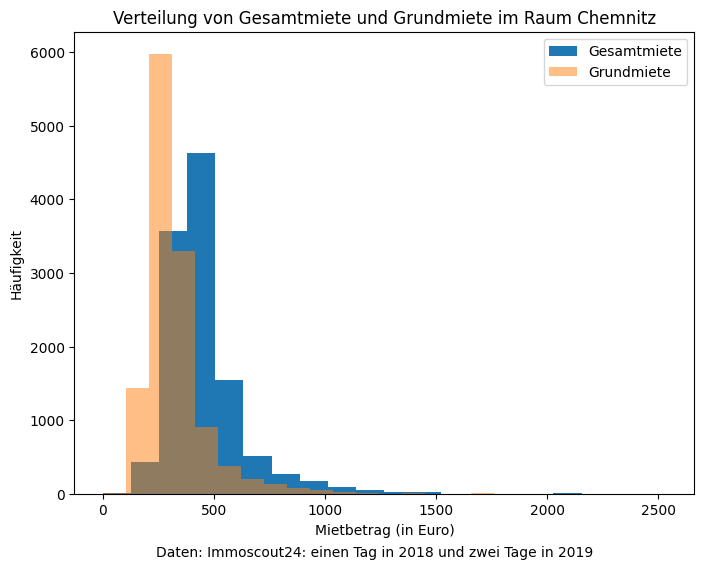

In [997]:
plt.figure(figsize=(8, 6))

plt.hist(chemnitz_in["totalRent"], bins=20, label='Gesamtmiete')

plt.hist(chemnitz_in["baseRent"], bins=20, alpha=0.5, label='Grundmiete')

plt.title('Verteilung von Gesamtmiete und Grundmiete im Raum Chemnitz')
plt.xlabel('Mietbetrag (in Euro)')
plt.ylabel('Häufigkeit')
plt.legend()
plt.figtext(0.5, 0, 'Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019', ha='center', va='bottom')

plt.show()

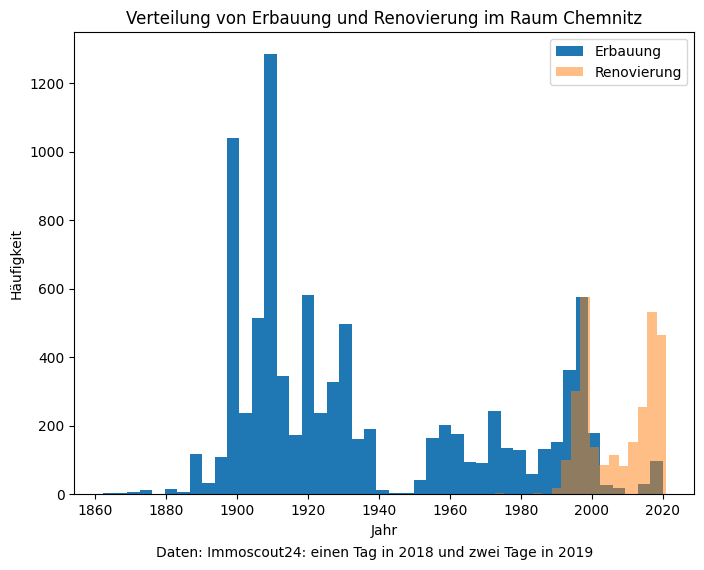

In [998]:
plt.figure(figsize=(8, 6))

plt.hist(chemnitz_in["yearConstructed"], bins=45, label='Erbauung')

plt.hist(chemnitz_in["lastRefurbish"], bins=45, alpha=0.5, label='Renovierung')

plt.title('Verteilung von Erbauung und Renovierung im Raum Chemnitz')
plt.xlabel('Jahr')
plt.ylabel('Häufigkeit')
plt.legend()
plt.figtext(0.5, 0, 'Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019', ha='center', va='bottom')

plt.show()

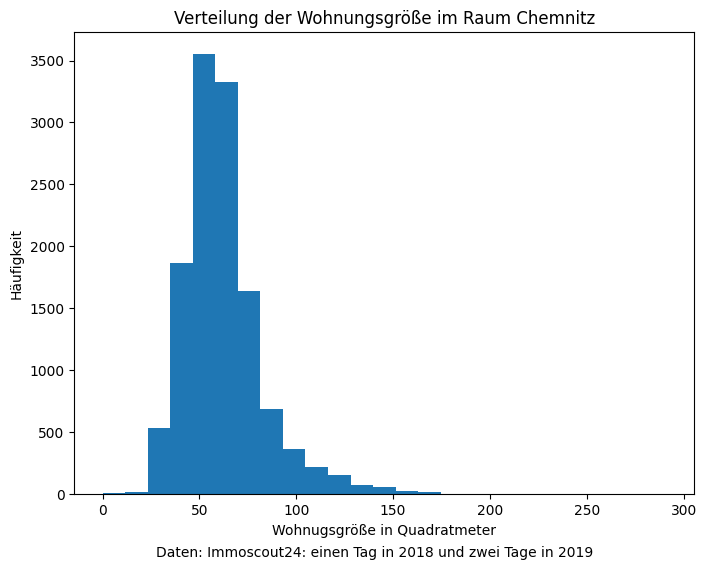

In [999]:
plt.figure(figsize=(8, 6))

plt.hist(chemnitz_in["livingSpace"], bins=25)

plt.title('Verteilung der Wohnungsgröße im Raum Chemnitz')
plt.xlabel('Wohnugsgröße in Quadratmeter')
plt.ylabel('Häufigkeit')
plt.figtext(0.5, 0, 'Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019', ha='center', va='bottom')

plt.show()

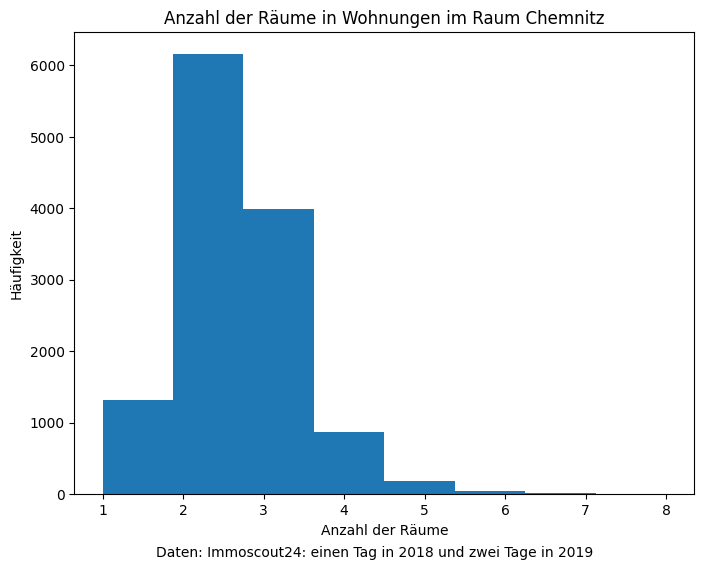

In [1000]:
plt.figure(figsize=(8, 6))

plt.hist(chemnitz_in["noRooms"], bins=8)

plt.title('Anzahl der Räume in Wohnungen im Raum Chemnitz')
plt.xlabel('Anzahl der Räume')
plt.ylabel('Häufigkeit')
plt.figtext(0.5, 0, 'Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019', ha='center', va='bottom')

plt.show()

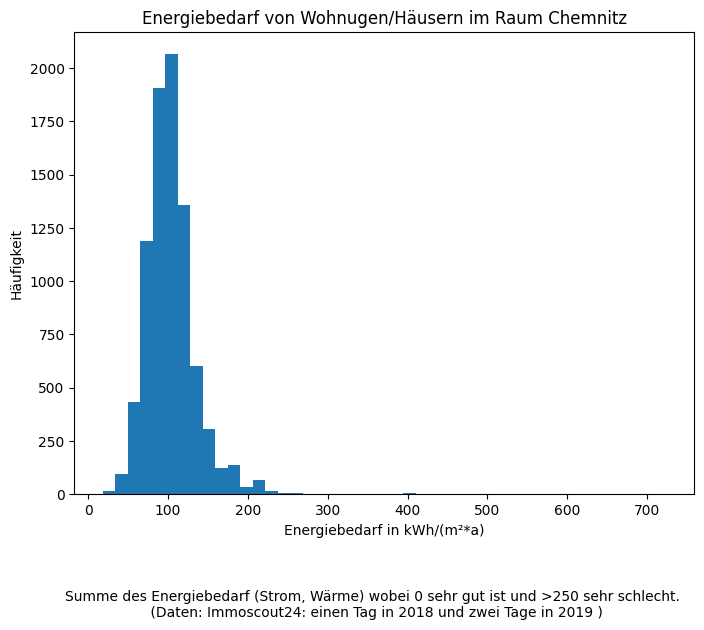

In [1001]:
plt.figure(figsize=(8, 6))

plt.hist(chemnitz_in["thermalChar"], bins=45)

plt.title('Energiebedarf von Wohnugen/Häusern im Raum Chemnitz')
plt.xlabel('Energiebedarf in kWh/(m²*a)')
plt.ylabel('Häufigkeit')
plt.figtext(0.5, -0.1, 'Summe des Energiebedarf (Strom, Wärme) wobei 0 sehr gut ist und >250 sehr schlecht. \n (Daten: Immoscout24: einen Tag in 2018 und zwei Tage in 2019 )', ha='center', va='bottom')
plt.show()

In [1002]:
# Kontrolle des Datensatzes
chemnitz_in.shape

(12566, 17)

##### Scatter

array([[<Axes: xlabel='totalRent', ylabel='totalRent'>,
        <Axes: xlabel='yearConstructed', ylabel='totalRent'>,
        <Axes: xlabel='baseRent', ylabel='totalRent'>,
        <Axes: xlabel='livingSpace', ylabel='totalRent'>,
        <Axes: xlabel='noRooms', ylabel='totalRent'>,
        <Axes: xlabel='thermalChar', ylabel='totalRent'>,
        <Axes: xlabel='lastRefurbish', ylabel='totalRent'>],
       [<Axes: xlabel='totalRent', ylabel='yearConstructed'>,
        <Axes: xlabel='yearConstructed', ylabel='yearConstructed'>,
        <Axes: xlabel='baseRent', ylabel='yearConstructed'>,
        <Axes: xlabel='livingSpace', ylabel='yearConstructed'>,
        <Axes: xlabel='noRooms', ylabel='yearConstructed'>,
        <Axes: xlabel='thermalChar', ylabel='yearConstructed'>,
        <Axes: xlabel='lastRefurbish', ylabel='yearConstructed'>],
       [<Axes: xlabel='totalRent', ylabel='baseRent'>,
        <Axes: xlabel='yearConstructed', ylabel='baseRent'>,
        <Axes: xlabel='baseRent', 

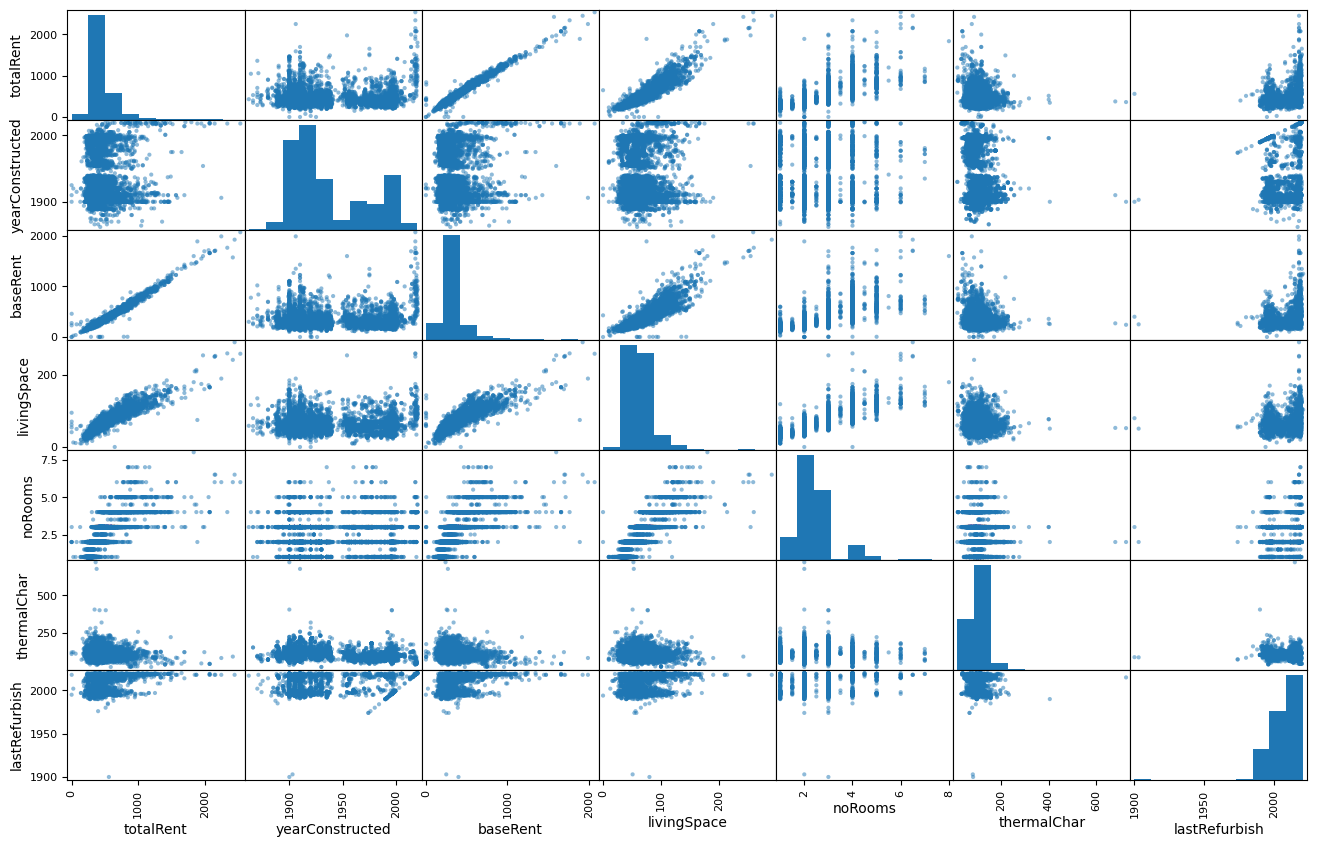

In [1003]:
columnsWithNumbers = ['totalRent', 'yearConstructed', 'baseRent', 'livingSpace', 'noRooms', 'thermalChar', 'lastRefurbish']
pd.plotting.scatter_matrix(chemnitz_in[columnsWithNumbers], figsize=(16,10))

In [1004]:
# Kontrolle des Datensatzes
chemnitz_in.shape

(12566, 17)

##### Heatmap

In [1005]:
import seaborn as sns

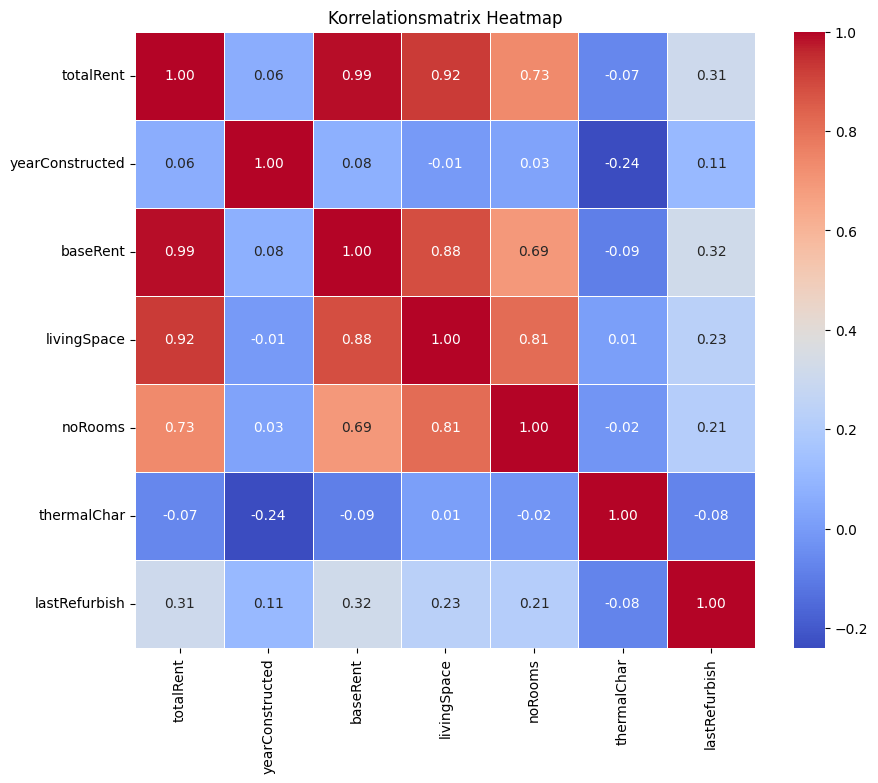

In [1006]:
correlation_matrix = chemnitz_in[columnsWithNumbers].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korrelationsmatrix Heatmap')
plt.show()

In [1007]:
# Kontrolle des Datensatzes
chemnitz_in.shape

(12566, 17)

### Erkenntnisse Data Exploration

Entfernen von Wohnugen/Häusern:
- mit mehr als 10 Räumen (1x)
- mehr als 1000 qm (1x)
- mit Energiebedarf größer 1000 kWh/(m²*a) (7x)

Aufällig:
- Ausreißer bei Anzahl an Räumen und Wohnfläche was evtl. ein Schloss ist.
- 50 % der Wohnungen/Häuser haben 2 oder 3 Räume
- 57.5 % der Wohnungen/Häuser haben einen Balkon
- 50 % der Wohnungen/Häuser wurden zwischen 1910 und 1972 erbaut
- 50 % der Wohnungen/Häuser wurden zwischen 1998 und 2017 renoviert
- Total Rent und Base Rent korreliert gut mit living Space und Anzahl der Räume


### 3. Data Preparation

Bereits entfernte Ausreißer (Erkenntnis aus Aufgabe 2.3):
- mit mehr als 10 Räumen (1x)
- mehr als 1000 qm (1x)
- mit Energiebedarf größer 1000 kWh/(m²*a) (7x)

Der Datensatz besitzt nurnoch 12566 Datenzeilen (zu Beginn 12575) und damit 2 weniger als zu Beginn.

#### 3.1 Daten bereinigen

In [1008]:
chemnitz_in = pd.read_csv("./outData.csv", sep="\t")
chemnitz_in.head(10)

,regio1,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,petsAllowed,noRooms,thermalChar,regio2,regio3,lastRefurbish,date
0,Sachsen,False,True,307.00,1930.0,False,219.00,40.20,NaN,normal,NaN,2.0,123.0,Chemnitz,Sonnenberg,NaN,Oct19
1,Sachsen,False,True,501.00,NaN,False,340.00,65.00,fully_renovated,normal,yes,3.0,NaN,Chemnitz,Lutherviertel,NaN,Oct19
2,Sachsen,False,True,425.00,1909.0,True,280.00,53.12,well_kept,normal,negotiable,2.0,153.0,Chemnitz,Bernsdorf,2014.0,Feb20
3,Sachsen,False,True,760.00,1998.0,True,560.00,115.00,NaN,NaN,NaN,5.0,NaN,Chemnitz,Sonnenberg,2000.0,Oct19
4,Sachsen,False,False,715.00,1920.0,False,515.00,102.30,well_kept,NaN,NaN,3.0,NaN,Chemnitz,Zentrum,1995.0,Oct19
5,Sachsen,False,False,260.00,1900.0,False,170.00,41.19,refurbished,normal,NaN,1.5,82.0,Chemnitz,Altchemnitz,NaN,Feb20
6,Sachsen,False,False,397.00,NaN,True,276.00,55.00,fully_renovated,NaN,yes,2.0,NaN,Chemnitz,Bernsdorf,NaN,Sep18
7,Sachsen,False,False,282.00,1998.0,False,200.00,43.17,NaN,NaN,NaN,2.0,57.2,Chemnitz,Hilbersdorf,NaN,May19
8,Sachsen,False,True,906.11,1880.0,False,697.81,104.15,NaN,NaN,NaN,4.0,68.0,Chemnitz,Schloßchemnitz,NaN,Feb20
9,Sachsen,False,False,NaN,NaN,False,289.00,60.00,need_of_renovation,NaN,negotiable,2.0,NaN,Chemnitz,Ebersdorf,NaN,Sep18


In [1009]:
chemnitz_in["balcony"] = chemnitz_in["balcony"].fillna(False)
chemnitz_in["balcony"] = chemnitz_in["balcony"].astype(bool)

In [1010]:
# totalRent besitzt NaN Werte
# NaN ersetzen durch Durchschnitt
average_total_rent_mean = chemnitz_in['totalRent'].mean()
chemnitz_in["totalRent"] = chemnitz_in["totalRent"].fillna(average_total_rent_mean)
chemnitz_in['totalRent'] = chemnitz_in['totalRent'].round(2)

In [1011]:
# yearConstructed besitzt NaN Werte
# NaN ersetzen durch Durchschnitt
average_year_constructed_mean = chemnitz_in['yearConstructed'].mean()
chemnitz_in["yearConstructed"] = chemnitz_in["yearConstructed"].fillna(average_year_constructed_mean)
chemnitz_in["yearConstructed"] = chemnitz_in["yearConstructed"].astype(int)

In [1012]:
# baseRent besitzt NaN Werte
living_space_mean = chemnitz_in['livingSpace'].mean()
living_space_with_dates = chemnitz_in[chemnitz_in['livingSpace'].astype(str).str.contains('\d{2}\.\d{2}\.\d{4}', na=False)]
chemnitz_in.loc[living_space_with_dates.index, 'livingSpace'] = living_space_mean.round(2)

In [1013]:
# condition besitzt NaN Werte
# NaN ersetzen durch "unkown"
chemnitz_in["condition"] = chemnitz_in["condition"].fillna("unkown")
chemnitz_in["condition"].unique()

array(['unkown', 'fully_renovated', 'well_kept', 'refurbished',
       'need_of_renovation', 'first_time_use', 'mint_condition',
       'modernized', 'first_time_use_after_refurbishment', 'negotiable'],
      dtype=object)

In [1014]:
# interiorQual besitzt NaN Werte
# NaN ersetzen durch "unkown"
chemnitz_in["interiorQual"] = chemnitz_in["interiorQual"].fillna("unkown")
chemnitz_in["interiorQual"].unique()

array(['normal', 'unkown', 'sophisticated', 'luxury', 'simple'],
      dtype=object)

In [1015]:
# Alle NaN Werte bei petsAllowed Werte zu false setzen.
chemnitz_in['petsAllowed'] = chemnitz_in['petsAllowed'].fillna("no")
chemnitz_in["petsAllowed"].unique()

array(['no', 'yes', 'negotiable'], dtype=object)

In [1016]:
# noRooms besitzt wWerte im Format eines Datums
no_rooms_with_dates = chemnitz_in[chemnitz_in['noRooms'].astype(str).str.contains('\d{2}\.\d{2}\.\d{4}', na=False)]
chemnitz_in.loc[no_rooms_with_dates.index, 'noRooms'] = 2

In [1017]:
# condition besitzt wWerte im Format eines Datums
condition = chemnitz_in['noRooms'].astype(str).str.match(r'\d{2}\.\d{2}\.\d{4}')
chemnitz_in.loc[condition, 'noRooms'] = 2
chemnitz_in["noRooms"] = chemnitz_in["noRooms"].astype(int)

In [1018]:
# regio3
# Beim export/import in eine csv hatte das ß Probleme
chemnitz_in['regio3'] = chemnitz_in['regio3'].str.replace('ß', 'ss')

In [1019]:
# lastRefurbish
# NaN Werte mit Erbauungsdatum ersetzen
chemnitz_in['lastRefurbish'] = chemnitz_in['lastRefurbish'].combine_first(chemnitz_in['yearConstructed'])
chemnitz_in["lastRefurbish"] = chemnitz_in["lastRefurbish"].astype(int)

In [1020]:
# date
# Spalte entfernen, da unbekannt in welchem Jahr
chemnitz_in.drop(columns=['date'], inplace=True)

In [1021]:
# Bundesland kann aus Chemnitz hergeleitet werden
chemnitz_in.drop(columns=['regio1'], inplace=True)

Spalten die "falsche" Werte besitzen:


In [1023]:
# thermalChar besitzt NaN Werte
# NaN ersetzen durch Durchschnitt
thermal_char_mean = chemnitz_in['thermalChar'].mean()
chemnitz_in["thermalChar"] = chemnitz_in["thermalChar"].fillna(thermal_char_mean)

In [1024]:
saveToCsv(chemnitz_in, "chemnitz_cleaned")

In [1025]:
chemnitz_in.head(10)

,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,petsAllowed,noRooms,thermalChar,regio2,regio3,lastRefurbish
0,False,True,307.00,1930,False,219.00,40.20,unkown,normal,no,2,123.000000,Chemnitz,Sonnenberg,1930
1,False,True,501.00,1935,False,340.00,65.00,fully_renovated,normal,yes,3,104.832891,Chemnitz,Lutherviertel,1935
2,False,True,425.00,1909,True,280.00,53.12,well_kept,normal,negotiable,2,153.000000,Chemnitz,Bernsdorf,2014
3,False,True,760.00,1998,True,560.00,115.00,unkown,unkown,no,5,104.832891,Chemnitz,Sonnenberg,2000
4,False,False,715.00,1920,False,515.00,102.30,well_kept,unkown,no,3,104.832891,Chemnitz,Zentrum,1995
5,False,False,260.00,1900,False,170.00,41.19,refurbished,normal,no,1,82.000000,Chemnitz,Altchemnitz,1900
6,False,False,397.00,1935,True,276.00,55.00,fully_renovated,unkown,yes,2,104.832891,Chemnitz,Bernsdorf,1935
7,False,False,282.00,1998,False,200.00,43.17,unkown,unkown,no,2,57.200000,Chemnitz,Hilbersdorf,1998
8,False,True,906.11,1880,False,697.81,104.15,unkown,unkown,no,4,68.000000,Chemnitz,Schlosschemnitz,1880
9,False,False,458.50,1935,False,289.00,60.00,need_of_renovation,unkown,negotiable,2,104.832891,Chemnitz,Ebersdorf,1935


In [1026]:
chemnitz_in.shape

(12575, 15)

#### 3.2 Feature Engineering

Backward Feature Enginering zur Auswahl relevanter Attribute.
Daraus folgt:
- Wohnungen ohne Balkon entfernt werden.
- Wohnungen älter als 40 Jahre und nicht Renoviert umfassende Renovierungen notwendig sind.
- Wohnungen die vor 10 Jahren die letzte Renovierung kleine Sanierungen notwendig sind.

Vorhersage: Mit wiviel Umsatz ist zu rechnen?

Anmerkung: Testen und Ergebnisse betrachten.

Auswahl der Features:
- Erbauungsjahr
- Letzte Renovierung
- Grundkosten und Gesamtkosten (geringe Kosten => schlechter Zustand der Wohnung)
- Balkon
- Wohnfläche (größere Wohnungen haben i.R. einen Außenbereich)
- Energiebedarf (schlecht => Reonvierungsbedürftig)

In [1027]:
chemnitz_apartments_32 = pd.read_csv('./chemnitz_cleaned.csv', sep="\t")
chemnitz_apartments_32.shape

(12575, 15)

In [1068]:
import pandas as pd

# chemnitz_in = pd.get_dummies(chemnitz_in, columns=['hasKitchen'])

chemnitz_interesting_features = ["newlyConst", "condition", "hasKitchen", "interiorQual", "petsAllowed", "yearConstructed", "lastRefurbish", "balcony", "thermalChar", "totalRent", "baseRent", "livingSpace", "noRooms"]
chemnitz_apartments_32 = chemnitz_apartments_32[chemnitz_interesting_features]
chemnitz_apartments_32.info()

KeyError: "['condition', 'interiorQual', 'petsAllowed'] not in index"

In [1029]:
# Balcony in 0 für false und 1 für true
chemnitz_in.loc[:, "balcony"] = chemnitz_in["balcony"].astype(int)
chemnitz_in.loc[:, "hasKitchen"] = chemnitz_in["hasKitchen"].astype(int)
chemnitz_in.loc[:, "newlyConst"] = chemnitz_in["newlyConst"].astype(int)
chemnitz_in.shape

/var/folders/1m/v11j5lls4pz95rywbklmwxy00000gn/T/ipykernel_38899/2435977960.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  chemnitz_in.loc[:, "balcony"] = chemnitz_in["balcony"].astype(int)
/var/folders/1m/v11j5lls4pz95rywbklmwxy00000gn/T/ipykernel_38899/2435977960.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 1 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  chemnitz_in.loc[:, "hasKitchen"] = chemnitz_in["hasKitchen"].astype(int)
/var/folders/1m/v11j5lls4pz95rywbklmwxy00000gn/T/ipykernel_38899/2435977960.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 1 0 0]' has dtype incompatible with

(12575, 13)

In [1030]:

chemnitz_in = pd.get_dummies(chemnitz_in, columns=['condition'])
chemnitz_in = pd.get_dummies(chemnitz_in, columns=['interiorQual'])
chemnitz_in = pd.get_dummies(chemnitz_in, columns=['petsAllowed'])
#chemnitz_in = pd.get_dummies(chemnitz_in, columns=['regio3'])

In [1031]:
chemnitz_in

,newlyConst,hasKitchen,yearConstructed,lastRefurbish,balcony,thermalChar,totalRent,baseRent,livingSpace,noRooms,...,condition_unkown,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,interiorQual_unkown,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes
0,0,0,1930,1930,1,123.000000,307.00,219.00,40.20,2,...,True,False,False,True,False,False,False,False,True,False
1,0,0,1935,1935,1,104.832891,501.00,340.00,65.00,3,...,False,False,False,True,False,False,False,False,False,True
2,0,1,1909,2014,1,153.000000,425.00,280.00,53.12,2,...,False,True,False,True,False,False,False,True,False,False
3,0,1,1998,2000,1,104.832891,760.00,560.00,115.00,5,...,True,False,False,False,False,False,True,False,True,False
4,0,0,1920,1995,0,104.832891,715.00,515.00,102.30,3,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,0,0,1895,1895,0,96.000000,293.00,198.00,43.00,2,...,True,False,False,True,False,False,False,False,True,False
12571,0,0,1935,1935,1,104.832891,444.00,314.00,59.00,2,...,False,False,False,False,False,True,False,True,False,False
12572,1,0,2018,2018,1,104.832891,799.88,611.88,91.13,3,...,False,False,False,False,False,True,False,True,False,False
12573,0,0,1935,1935,1,104.832891,326.00,222.00,47.34,1,...,False,False,False,True,False,False,False,True,False,False


Shape of Train Features: (10060, 27)
Shape of Test Features: (2515, 27)
Shape of Train Target: (10060,)
Shape of Test Target: (2515,)
Column Names: ['newlyConst' 'hasKitchen' 'yearConstructed' 'lastRefurbish' 'balcony'
 'totalRent' 'baseRent' 'livingSpace' 'noRooms' 'condition_first_time_use'
 'condition_first_time_use_after_refurbishment'
 'condition_fully_renovated' 'condition_mint_condition'
 'condition_modernized' 'condition_need_of_renovation'
 'condition_negotiable' 'condition_refurbished' 'condition_unkown'
 'condition_well_kept' 'interiorQual_luxury' 'interiorQual_normal'
 'interiorQual_simple' 'interiorQual_sophisticated' 'interiorQual_unkown'
 'petsAllowed_negotiable' 'petsAllowed_no' 'petsAllowed_yes']


/Users/tobiasgleiter/dev/src/tobiasgleiter/github/data-science/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.517e+06, tolerance: 1.947e+03
  model = cd_fast.enet_coordinate_descent(


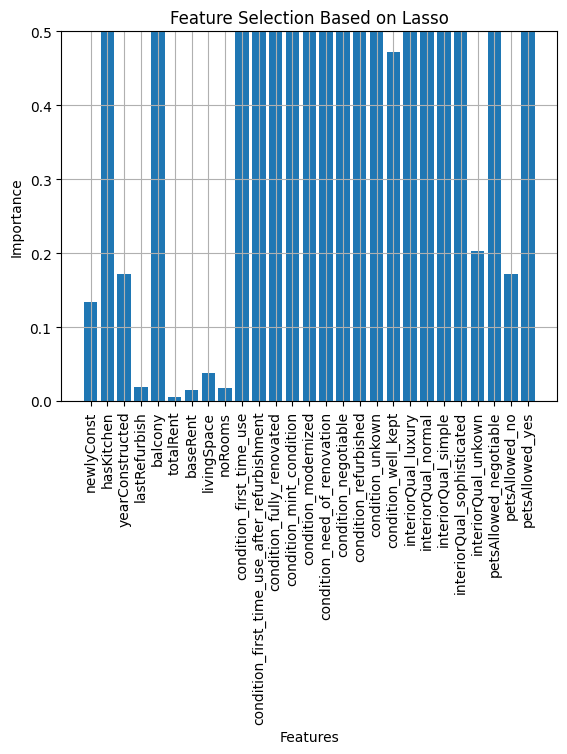

In [1032]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

target="thermalChar"

X = chemnitz_in.drop(target, axis=1)
y = chemnitz_in[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

names=chemnitz_in.drop(target, axis=1).columns
print("Column Names: {}".format(names.values))

# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns. 
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.5)
plt.show()

In [1033]:
# Subsetting the features which has more than 0.001 importance.
feature_subset=np.array(names)[lasso1_coef>0.1]
print("Selected Feature Columns: {}".format(feature_subset))

# Adding the target to the list of feaatures. 
feature_subset=np.append(feature_subset, target)
print("Selected Columns: {}".format(feature_subset))

Selected Feature Columns: ['newlyConst' 'hasKitchen' 'yearConstructed' 'balcony'
 'condition_first_time_use' 'condition_first_time_use_after_refurbishment'
 'condition_fully_renovated' 'condition_mint_condition'
 'condition_modernized' 'condition_need_of_renovation'
 'condition_negotiable' 'condition_refurbished' 'condition_unkown'
 'condition_well_kept' 'interiorQual_luxury' 'interiorQual_normal'
 'interiorQual_simple' 'interiorQual_sophisticated' 'interiorQual_unkown'
 'petsAllowed_negotiable' 'petsAllowed_no' 'petsAllowed_yes']
Selected Columns: ['newlyConst' 'hasKitchen' 'yearConstructed' 'balcony'
 'condition_first_time_use' 'condition_first_time_use_after_refurbishment'
 'condition_fully_renovated' 'condition_mint_condition'
 'condition_modernized' 'condition_need_of_renovation'
 'condition_negotiable' 'condition_refurbished' 'condition_unkown'
 'condition_well_kept' 'interiorQual_luxury' 'interiorQual_normal'
 'interiorQual_simple' 'interiorQual_sophisticated' 'interiorQual_unko

In [1034]:
df_new = chemnitz_in[feature_subset]
print(df_new.head())

   newlyConst  hasKitchen  yearConstructed  balcony  condition_first_time_use  \
0           0           0             1930        1                     False   
1           0           0             1935        1                     False   
2           0           1             1909        1                     False   
3           0           1             1998        1                     False   
4           0           0             1920        0                     False   

   condition_first_time_use_after_refurbishment  condition_fully_renovated  \
0                                         False                      False   
1                                         False                       True   
2                                         False                      False   
3                                         False                      False   
4                                         False                      False   

   condition_mint_condition  condition_moder

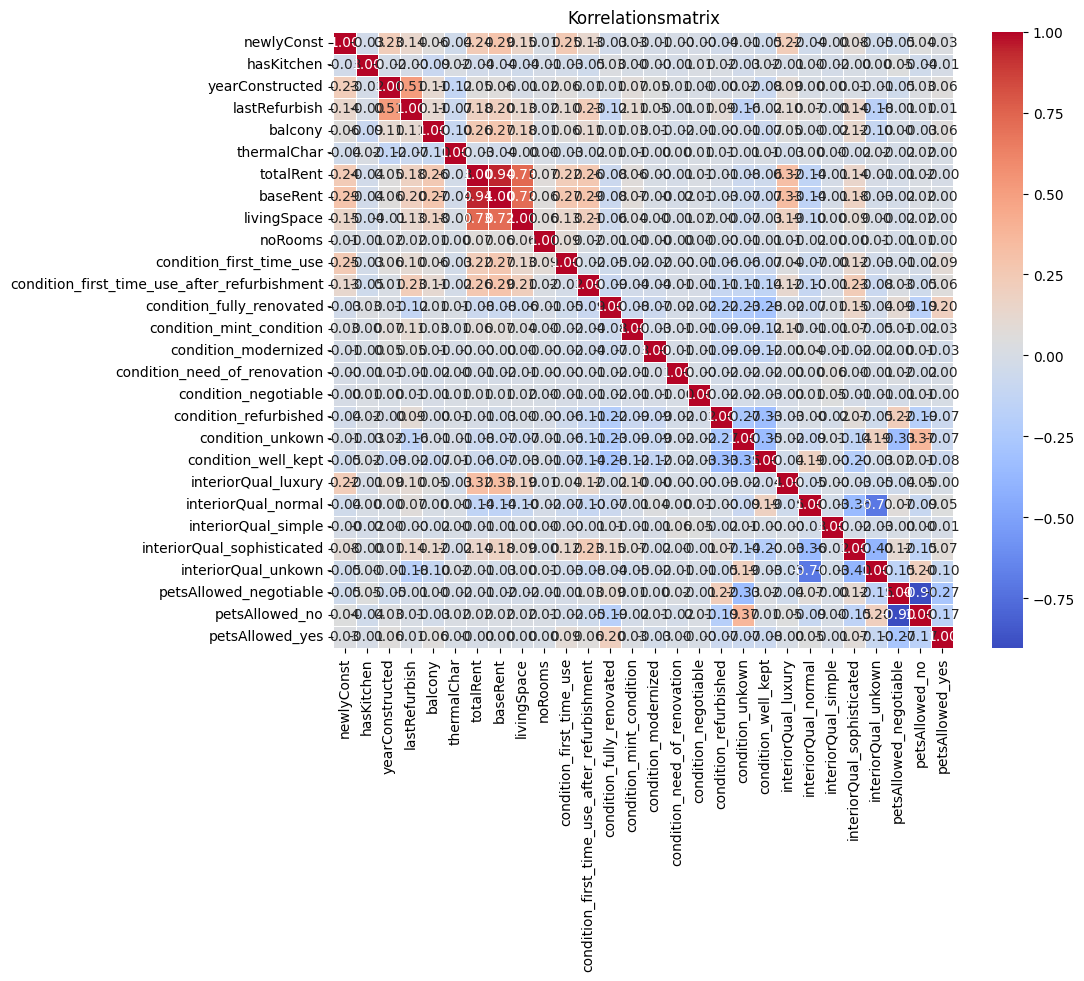

In [1035]:
import seaborn as sns
import matplotlib.pyplot as plt

# Erstellen der Korrelationsmatrix
correlation_matrix = chemnitz_in.corr()

# Visualisierung der Korrelationsmatrix als Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korrelationsmatrix')
plt.show()


## 4. Modeling und Evaluation

Gewählte Verfahren:
- Lineare Regression
- Random Forest Resgression
- SVM

### Prepare Data Regression Ready

In [1036]:
chemnitz_apartments_4 = pd.read_csv('./chemnitz_cleaned.csv', sep="\t")
chemnitz_apartments_4.shape

(12575, 15)

In [1037]:
chemnitz_apartments_4.head(5)

,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,petsAllowed,noRooms,thermalChar,regio2,regio3,lastRefurbish
0,False,True,307.0,1930,False,219.0,40.20,unkown,normal,no,2,123.000000,Chemnitz,Sonnenberg,1930
1,False,True,501.0,1935,False,340.0,65.00,fully_renovated,normal,yes,3,104.832891,Chemnitz,Lutherviertel,1935
2,False,True,425.0,1909,True,280.0,53.12,well_kept,normal,negotiable,2,153.000000,Chemnitz,Bernsdorf,2014
3,False,True,760.0,1998,True,560.0,115.00,unkown,unkown,no,5,104.832891,Chemnitz,Sonnenberg,2000
4,False,False,715.0,1920,False,515.0,102.30,well_kept,unkown,no,3,104.832891,Chemnitz,Zentrum,1995


In [1038]:
# Daten vorbereiten für Regresssion
chemnitz_apartments_4.loc[:, "balcony"] = chemnitz_apartments_4["balcony"].astype(int)
chemnitz_apartments_4.loc[:, "hasKitchen"] = chemnitz_apartments_4["hasKitchen"].astype(int)
chemnitz_apartments_4.loc[:, "newlyConst"] = chemnitz_apartments_4["newlyConst"].astype(int)
chemnitz_apartments_4 = pd.get_dummies(chemnitz_apartments_4, columns=['petsAllowed'])
chemnitz_apartments_4 = pd.get_dummies(chemnitz_apartments_4, columns=['regio3'])
chemnitz_apartments_4 = pd.get_dummies(chemnitz_apartments_4, columns=['regio2'])
# Define mapping dictionaries for condition and interiorQual
condition_mapping = {
    'unkown': 0,
    'fully_renovated': 1,
    'well_kept': 0.8,
    'refurbished': 0.9,
    'need_of_renovation': 0.2,
    'first_time_use': 1,
    'mint_condition': 1,
    'modernized': 0.9,
    'first_time_use_after_refurbishment': 1,
    'negotiable': 0.5
}

interior_qual_mapping = {
    'normal': 0.5,
    'unkown': 0,
    'sophisticated': 0.9,
    'luxury': 1,
    'simple': 0.2
}

# Replace categorical values with mapped values
chemnitz_apartments_4['condition'] = chemnitz_apartments_4['condition'].map(condition_mapping)
chemnitz_apartments_4['interiorQual'] = chemnitz_apartments_4['interiorQual'].map(interior_qual_mapping)

/var/folders/1m/v11j5lls4pz95rywbklmwxy00000gn/T/ipykernel_38899/2674349969.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  chemnitz_apartments_4.loc[:, "balcony"] = chemnitz_apartments_4["balcony"].astype(int)
/var/folders/1m/v11j5lls4pz95rywbklmwxy00000gn/T/ipykernel_38899/2674349969.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 1 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  chemnitz_apartments_4.loc[:, "hasKitchen"] = chemnitz_apartments_4["hasKitchen"].astype(int)
/var/folders/1m/v11j5lls4pz95rywbklmwxy00000gn/T/ipykernel_38899/2674349969.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0

In [1039]:
chemnitz_apartments_4.head(5)

,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,noRooms,...,regio3_Rottluff,regio3_Röhrsdorf,regio3_Schlosschemnitz,regio3_Schönau,regio3_Siegmar,regio3_Sonnenberg,regio3_Wittgensdorf,regio3_Yorckgebiet,regio3_Zentrum,regio2_Chemnitz
0,0,1,307.0,1930,0,219.0,40.20,0.0,0.5,2,...,False,False,False,False,False,True,False,False,False,True
1,0,1,501.0,1935,0,340.0,65.00,1.0,0.5,3,...,False,False,False,False,False,False,False,False,False,True
2,0,1,425.0,1909,1,280.0,53.12,0.8,0.5,2,...,False,False,False,False,False,False,False,False,False,True
3,0,1,760.0,1998,1,560.0,115.00,0.0,0.0,5,...,False,False,False,False,False,True,False,False,False,True
4,0,0,715.0,1920,0,515.0,102.30,0.8,0.0,3,...,False,False,False,False,False,False,False,False,True,True


In [1040]:
saveToCsv(chemnitz_apartments_4, "chemnitz_regression_ready")

### 4.1 Linear Regression

#### 4.1.2 Full Linear Regression

In [1041]:
chemnitz_full_411= pd.read_csv("./chemnitz_regression_ready.csv", sep="\t")
chemnitz_full_411.head(5)

,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,noRooms,...,regio3_Rottluff,regio3_Röhrsdorf,regio3_Schlosschemnitz,regio3_Schönau,regio3_Siegmar,regio3_Sonnenberg,regio3_Wittgensdorf,regio3_Yorckgebiet,regio3_Zentrum,regio2_Chemnitz
0,0,1,307.0,1930,0,219.0,40.20,0.0,0.5,2,...,False,False,False,False,False,True,False,False,False,True
1,0,1,501.0,1935,0,340.0,65.00,1.0,0.5,3,...,False,False,False,False,False,False,False,False,False,True
2,0,1,425.0,1909,1,280.0,53.12,0.8,0.5,2,...,False,False,False,False,False,False,False,False,False,True
3,0,1,760.0,1998,1,560.0,115.00,0.0,0.0,5,...,False,False,False,False,False,True,False,False,False,True
4,0,0,715.0,1920,0,515.0,102.30,0.8,0.0,3,...,False,False,False,False,False,False,False,False,True,True


In [1042]:
from sklearn.linear_model import LinearRegression
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

target="totalRent"

X = chemnitz_full_411.drop(target, axis=1)
y = chemnitz_full_411[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred = linear_reg_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared (R2) Score: 0.9219058821902197
Root Mean Squared Error (RMSE): 49.96934940713366
Mean Absolute Percentage Error (MAPE): 30.062812153714795


- R2: 0.92 zeigt einen guten Fit der Regressiongerade mit der Zielvariable "totalRent"
- RMSE: Die Vorgersage ist durschnittlich circa 52.22 entfernt von der Zielvariable
- MAPE: Prozentzahl hat keine Aussage hier.

#### 4.1.2 Part Linear Regression

In [1043]:
chemnitz_part_412 = pd.read_csv("./chemnitz_regression_ready.csv", sep="\t")
chemnitz_part_412.head(5)

,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,noRooms,...,regio3_Rottluff,regio3_Röhrsdorf,regio3_Schlosschemnitz,regio3_Schönau,regio3_Siegmar,regio3_Sonnenberg,regio3_Wittgensdorf,regio3_Yorckgebiet,regio3_Zentrum,regio2_Chemnitz
0,0,1,307.0,1930,0,219.0,40.20,0.0,0.5,2,...,False,False,False,False,False,True,False,False,False,True
1,0,1,501.0,1935,0,340.0,65.00,1.0,0.5,3,...,False,False,False,False,False,False,False,False,False,True
2,0,1,425.0,1909,1,280.0,53.12,0.8,0.5,2,...,False,False,False,False,False,False,False,False,False,True
3,0,1,760.0,1998,1,560.0,115.00,0.0,0.0,5,...,False,False,False,False,False,True,False,False,False,True
4,0,0,715.0,1920,0,515.0,102.30,0.8,0.0,3,...,False,False,False,False,False,False,False,False,True,True


In [1044]:
from sklearn.linear_model import LinearRegression
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

target="totalRent"

chemnitz_part_412 = chemnitz_part_412.drop("baseRent", axis=1)
X = chemnitz_part_412.drop(target, axis=1)
y = chemnitz_part_412[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred = linear_reg_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared (R2) Score: 0.7194294903490811
Root Mean Squared Error (RMSE): 94.71429782582368
Mean Absolute Percentage Error (MAPE): 35.088170046670385


- R2: 0.84 zeigt einen "OK" Fit der Regressiongerade mit der Zielvariable "totalRent"
- RMSE: Die Vorgersage ist durschnittlich circa 76.68 entfernt von der Zielvariable
- MAPE: Prozentzahl hat keine Aussage hier.

### 4.2 Random Forest Regression

#### 4.2.1 Full

In [1045]:
chemnitz_full_421= pd.read_csv("./chemnitz_regression_ready.csv", sep="\t")
chemnitz_full_421.head(5)

,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,noRooms,...,regio3_Rottluff,regio3_Röhrsdorf,regio3_Schlosschemnitz,regio3_Schönau,regio3_Siegmar,regio3_Sonnenberg,regio3_Wittgensdorf,regio3_Yorckgebiet,regio3_Zentrum,regio2_Chemnitz
0,0,1,307.0,1930,0,219.0,40.20,0.0,0.5,2,...,False,False,False,False,False,True,False,False,False,True
1,0,1,501.0,1935,0,340.0,65.00,1.0,0.5,3,...,False,False,False,False,False,False,False,False,False,True
2,0,1,425.0,1909,1,280.0,53.12,0.8,0.5,2,...,False,False,False,False,False,False,False,False,False,True
3,0,1,760.0,1998,1,560.0,115.00,0.0,0.0,5,...,False,False,False,False,False,True,False,False,False,True
4,0,0,715.0,1920,0,515.0,102.30,0.8,0.0,3,...,False,False,False,False,False,False,False,False,True,True


In [1046]:
from sklearn.ensemble import RandomForestRegressor

target = "totalRent"

X = chemnitz_full_421.drop(target, axis=1)
y = chemnitz_full_421[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)


R-squared (R2) Score: 0.9330877320718718
Root Mean Squared Error (RMSE): 46.253798965417616
Mean Absolute Percentage Error (MAPE): 26.228108019225843


- R2: 0.94 zeigt einen "guten" Fit der Regressiongerade mit der Zielvariable "totalRent"
- RMSE: Die Vorgersage ist durschnittlich circa 45.26 entfernt von der Zielvariable
- MAPE: Prozentzahl hat keine Aussage hier.

#### 4.2.2 Part

In [1047]:
chemnitz_part_422= pd.read_csv("./chemnitz_regression_ready.csv", sep="\t")
chemnitz_part_422.head(5)

,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,noRooms,...,regio3_Rottluff,regio3_Röhrsdorf,regio3_Schlosschemnitz,regio3_Schönau,regio3_Siegmar,regio3_Sonnenberg,regio3_Wittgensdorf,regio3_Yorckgebiet,regio3_Zentrum,regio2_Chemnitz
0,0,1,307.0,1930,0,219.0,40.20,0.0,0.5,2,...,False,False,False,False,False,True,False,False,False,True
1,0,1,501.0,1935,0,340.0,65.00,1.0,0.5,3,...,False,False,False,False,False,False,False,False,False,True
2,0,1,425.0,1909,1,280.0,53.12,0.8,0.5,2,...,False,False,False,False,False,False,False,False,False,True
3,0,1,760.0,1998,1,560.0,115.00,0.0,0.0,5,...,False,False,False,False,False,True,False,False,False,True
4,0,0,715.0,1920,0,515.0,102.30,0.8,0.0,3,...,False,False,False,False,False,False,False,False,True,True


In [1048]:
from sklearn.ensemble import RandomForestRegressor

target = "totalRent"

chemnitz_part_422 = chemnitz_part_422.drop("baseRent", axis=1)
X = chemnitz_part_422.drop(target, axis=1)
y = chemnitz_part_422[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared (R2) Score: 0.8700069714689675
Root Mean Squared Error (RMSE): 64.46953894506875
Mean Absolute Percentage Error (MAPE): 27.146921182836564


- R2: 0.89 zeigt einen "OK" Fit der Regressiongerade mit der Zielvariable "totalRent"
- RMSE: Die Vorgersage ist durschnittlich circa 61.30 entfernt von der Zielvariable
- MAPE: Prozentzahl hat keine Aussage hier.

### 4.3 Support Vector Machine

#### 4.3.1 Full

In [1049]:
chemnitz_part_431= pd.read_csv("./chemnitz_regression_ready.csv", sep="\t")
chemnitz_part_431.head(5)

,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,noRooms,...,regio3_Rottluff,regio3_Röhrsdorf,regio3_Schlosschemnitz,regio3_Schönau,regio3_Siegmar,regio3_Sonnenberg,regio3_Wittgensdorf,regio3_Yorckgebiet,regio3_Zentrum,regio2_Chemnitz
0,0,1,307.0,1930,0,219.0,40.20,0.0,0.5,2,...,False,False,False,False,False,True,False,False,False,True
1,0,1,501.0,1935,0,340.0,65.00,1.0,0.5,3,...,False,False,False,False,False,False,False,False,False,True
2,0,1,425.0,1909,1,280.0,53.12,0.8,0.5,2,...,False,False,False,False,False,False,False,False,False,True
3,0,1,760.0,1998,1,560.0,115.00,0.0,0.0,5,...,False,False,False,False,False,True,False,False,False,True
4,0,0,715.0,1920,0,515.0,102.30,0.8,0.0,3,...,False,False,False,False,False,False,False,False,True,True


In [1050]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

target = "totalRent"

X = chemnitz_part_431.drop(target, axis=1)
y = chemnitz_part_431[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

svm_model = SVR(kernel='sigmoid') 
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared (R2) Score: 0.8507026671037776
Root Mean Squared Error (RMSE): 69.09085356586036
Mean Absolute Percentage Error (MAPE): 30.34651610782192


- R2: 0.81 zeigt einen "OK" Fit der Regressiongerade mit der Zielvariable "totalRent"
- RMSE: Die Vorgersage ist durschnittlich circa 82.36 entfernt von der Zielvariable
- MAPE: Prozentzahl hat keine Aussage hier.

#### 4.3.2 Part

In [1051]:
chemnitz_part_432= pd.read_csv("./chemnitz_regression_ready.csv", sep="\t")
chemnitz_part_432.head(5)

,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,noRooms,...,regio3_Rottluff,regio3_Röhrsdorf,regio3_Schlosschemnitz,regio3_Schönau,regio3_Siegmar,regio3_Sonnenberg,regio3_Wittgensdorf,regio3_Yorckgebiet,regio3_Zentrum,regio2_Chemnitz
0,0,1,307.0,1930,0,219.0,40.20,0.0,0.5,2,...,False,False,False,False,False,True,False,False,False,True
1,0,1,501.0,1935,0,340.0,65.00,1.0,0.5,3,...,False,False,False,False,False,False,False,False,False,True
2,0,1,425.0,1909,1,280.0,53.12,0.8,0.5,2,...,False,False,False,False,False,False,False,False,False,True
3,0,1,760.0,1998,1,560.0,115.00,0.0,0.0,5,...,False,False,False,False,False,True,False,False,False,True
4,0,0,715.0,1920,0,515.0,102.30,0.8,0.0,3,...,False,False,False,False,False,False,False,False,True,True


In [1052]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

target = "totalRent"

chemnitz_part_432 = chemnitz_part_432.drop("baseRent", axis=1)
X = chemnitz_part_432.drop(target, axis=1)
y = chemnitz_part_432[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

svm_model = SVR(kernel='sigmoid') 
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared (R2) Score: 0.5195197937964073
Root Mean Squared Error (RMSE): 123.94593387240478
Mean Absolute Percentage Error (MAPE): 34.01523015787547


- R2: 0.63 zeigt einen "schlecht" Fit der Regressiongerade mit der Zielvariable "totalRent"
- RMSE: Die Vorgersage ist durschnittlich circa 115.58 entfernt von der Zielvariable
- MAPE: Prozentzahl hat keine Aussage hier.

### 5. Modeling und Evaluation -Leere Felder

In [1053]:
chemnitz_apartments_5 = pd.read_csv('./chemnitz_cleaned.csv', sep="\t")
chemnitz_apartments_5.head(5)

,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,petsAllowed,noRooms,thermalChar,regio2,regio3,lastRefurbish
0,False,True,307.0,1930,False,219.0,40.20,unkown,normal,no,2,123.000000,Chemnitz,Sonnenberg,1930
1,False,True,501.0,1935,False,340.0,65.00,fully_renovated,normal,yes,3,104.832891,Chemnitz,Lutherviertel,1935
2,False,True,425.0,1909,True,280.0,53.12,well_kept,normal,negotiable,2,153.000000,Chemnitz,Bernsdorf,2014
3,False,True,760.0,1998,True,560.0,115.00,unkown,unkown,no,5,104.832891,Chemnitz,Sonnenberg,2000
4,False,False,715.0,1920,False,515.0,102.30,well_kept,unkown,no,3,104.832891,Chemnitz,Zentrum,1995


Auswahl von:
- "yearConstucted": alte Gebäude haben tendentiell einen höheren Energiebedarf
- "hasKitchen": Küchengeräte beinflussen den Energiebedarf
- "livingSpace": größere Flächen haben einen erhöhten Enrgiebedarf
- "condition": Zustand der Wohnung sagt aus, wie gut der Energiebedarf ist.
- "noRooms":

Nach ausprobeiren verschiedener Algorithmen hat sich ergeben, dass eine direktes Trainieren keine Lösung ist.
Deshalb müssen Spalten kombiniert werden.

In [1054]:
chemnitz_apartments_5["condition"].unique()

array(['unkown', 'fully_renovated', 'well_kept', 'refurbished',
       'need_of_renovation', 'first_time_use', 'mint_condition',
       'modernized', 'first_time_use_after_refurbishment', 'negotiable'],
      dtype=object)

In [1055]:
# Daten vorbereiten für Regresssion
chemnitz_apartments_5.loc[:, "balcony"] = chemnitz_apartments_5["balcony"].astype(int)
chemnitz_apartments_5.loc[:, "hasKitchen"] = chemnitz_apartments_5["hasKitchen"].astype(int)
chemnitz_apartments_5.loc[:, "newlyConst"] = chemnitz_apartments_5["newlyConst"].astype(int)
chemnitz_apartments_5 = pd.get_dummies(chemnitz_apartments_5, columns=['condition'])
chemnitz_apartments_5 = pd.get_dummies(chemnitz_apartments_5, columns=['interiorQual'])
#chemnitz_apartments_5 = chemnitz_apartments_5.drop(columns=['interiorQual'])
#chemnitz_apartments_5 = pd.get_dummies(chemnitz_apartments_5, columns=['petsAllowed'])
chemnitz_apartments_5 = chemnitz_apartments_5.drop(columns=['petsAllowed'])

chemnitz_apartments_5 = pd.get_dummies(chemnitz_apartments_5, columns=['regio3'])
chemnitz_apartments_5 = pd.get_dummies(chemnitz_apartments_5, columns=['regio2'])
#chemnitz_apartments_5 = chemnitz_apartments_5.drop(columns=['regio3'])
#chemnitz_apartments_5 = chemnitz_apartments_5.drop(columns=['regio2'])

/var/folders/1m/v11j5lls4pz95rywbklmwxy00000gn/T/ipykernel_38899/2952153662.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  chemnitz_apartments_5.loc[:, "balcony"] = chemnitz_apartments_5["balcony"].astype(int)
/var/folders/1m/v11j5lls4pz95rywbklmwxy00000gn/T/ipykernel_38899/2952153662.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 1 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  chemnitz_apartments_5.loc[:, "hasKitchen"] = chemnitz_apartments_5["hasKitchen"].astype(int)
/var/folders/1m/v11j5lls4pz95rywbklmwxy00000gn/T/ipykernel_38899/2952153662.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0

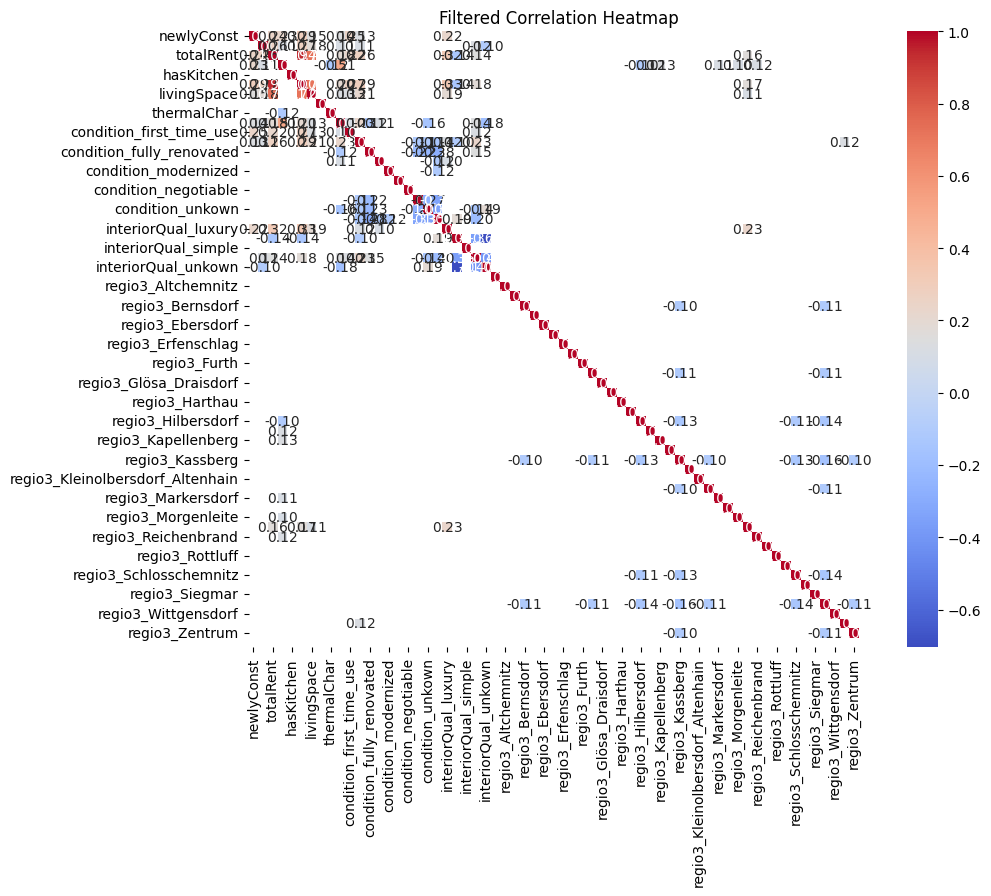

In [1056]:
import seaborn as sns
import matplotlib.pyplot as plt

# Erstellen der Korrelationsmatrix
correlation_matrix = chemnitz_apartments_5.corr()

# Define a threshold for minimum correlation value
threshold = 0.1  # You can adjust this threshold based on your preference

# Filter out features with correlation values below the threshold
correlation_matrix_filtered = correlation_matrix[abs(correlation_matrix) >= threshold]

# Plot the filtered correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Filtered Correlation Heatmap')
plt.show()


In [1057]:
chemnitz_apartments_5.head(5)

,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,noRooms,thermalChar,lastRefurbish,...,regio3_Rottluff,regio3_Röhrsdorf,regio3_Schlosschemnitz,regio3_Schönau,regio3_Siegmar,regio3_Sonnenberg,regio3_Wittgensdorf,regio3_Yorckgebiet,regio3_Zentrum,regio2_Chemnitz
0,0,1,307.0,1930,0,219.0,40.20,2,123.000000,1930,...,False,False,False,False,False,True,False,False,False,True
1,0,1,501.0,1935,0,340.0,65.00,3,104.832891,1935,...,False,False,False,False,False,False,False,False,False,True
2,0,1,425.0,1909,1,280.0,53.12,2,153.000000,2014,...,False,False,False,False,False,False,False,False,False,True
3,0,1,760.0,1998,1,560.0,115.00,5,104.832891,2000,...,False,False,False,False,False,True,False,False,False,True
4,0,0,715.0,1920,0,515.0,102.30,3,104.832891,1995,...,False,False,False,False,False,False,False,False,True,True


### 5.1 Feature Auswahl

In [1058]:
chemnitz_apartments_51 = chemnitz_apartments_5[['balcony','lastRefurbish','yearConstructed', 'thermalChar']]

0.001


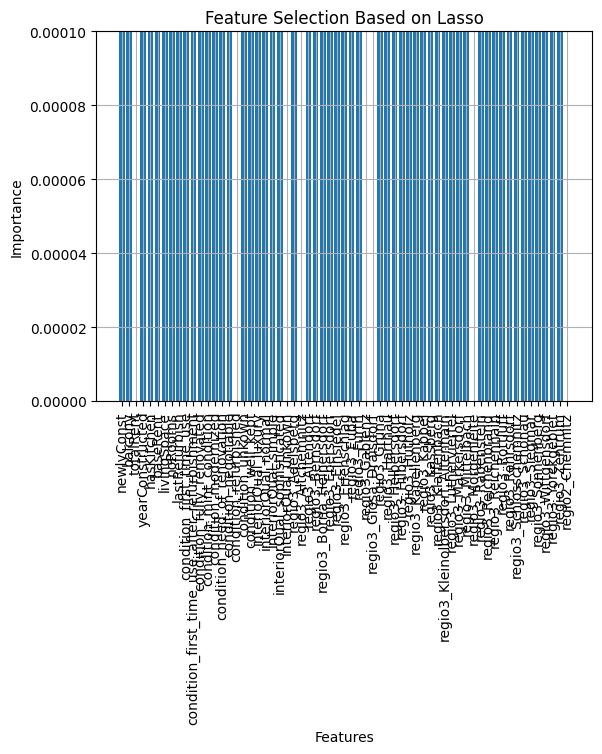

In [1059]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Assume chemnitz_apartments_5 contains the prepared data

# Define features (X) and target variable (y)
target_thermalChar = "thermalChar"
X = chemnitz_apartments_5.drop(columns=[target_thermalChar])  # Exclude 'thermalChar' column
y = chemnitz_apartments_5[target_thermalChar]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaling the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Define a range of alpha values to search
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# Create a parameter grid
param_grid = {'alpha': alphas}

# Perform grid search with cross-validation
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train_scaled)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(best_alpha)

# Lasso Regression Model
lasso_model = Lasso(alpha=best_alpha)  # You can adjust the alpha parameter as needed

# Train the model
lasso_model.fit(X_train_scaled, y_train_scaled)

# Obtain coefficients from the trained Lasso model
lasso_coef = np.abs(lasso_model.coef_)

# Plotting the Column Names and Importance of Columns
plt.bar(X.columns, lasso_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.0001)
plt.show()

In [1060]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared (R2) Score: -35.16471941138804
Root Mean Squared Error (RMSE): 338.8984688216792
Mean Absolute Percentage Error (MAPE): 339.20680722848476


In [1061]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# Define the Random Forest regressor
rf_model = RandomForestRegressor()  # You can adjust the number of trees (n_estimators)

# Train the model
rf_model.fit(X_train_scaled, y_train_scaled)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
r2_rf = r2_score(y_test_scaled, y_pred_rf)
rmse_rf = mean_squared_error(y_test_scaled, y_pred_rf, squared=False)
mape_rf = mean_absolute_percentage_error(y_test_scaled, y_pred_rf)

print("R-squared (R2) Score (Random Forest):", r2_rf)
print("Root Mean Squared Error (RMSE) (Random Forest):", rmse_rf)
print("Mean Absolute Percentage Error (MAPE) (Random Forest):", mape_rf)


R-squared (R2) Score (Random Forest): -0.15781540962862506
Root Mean Squared Error (RMSE) (Random Forest): 1.3784444634097783
Mean Absolute Percentage Error (MAPE) (Random Forest): 5.266754040351064


/Users/tobiasgleiter/dev/src/tobiasgleiter/github/data-science/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1062]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the Gradient Boosting regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the model
gb_model.fit(X_train_scaled, y_train_scaled)

# Predict on the testing set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
r2_gb = r2_score(y_test_scaled, y_pred_gb)
rmse_gb = mean_squared_error(y_test_scaled, y_pred_gb, squared=False)
mape_gb = mean_absolute_percentage_error(y_test_scaled, y_pred_gb)

print("R-squared (R2) Score (Gradient Boosting):", r2_gb)
print("Root Mean Squared Error (RMSE) (Gradient Boosting):", rmse_gb)
print("Mean Absolute Percentage Error (MAPE) (Gradient Boosting):", mape_gb)


R-squared (R2) Score (Gradient Boosting): -0.0010779725870146972
Root Mean Squared Error (RMSE) (Gradient Boosting): 1.281750700217696
Mean Absolute Percentage Error (MAPE) (Gradient Boosting): 4.346145637355643


/Users/tobiasgleiter/dev/src/tobiasgleiter/github/data-science/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1063]:
from sklearn.model_selection import cross_val_score

# Define the Gradient Boosting regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(gb_model, X_train_scaled, y_train_scaled, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())
print("Standard Deviation of R-squared Scores:", cv_scores.std())


Cross-Validation R-squared Scores: [ 0.6620215   0.45865048  0.12852781 -2.27814232  0.23092731]
Mean R-squared Score: -0.15960304208600112
Standard Deviation of R-squared Scores: 1.0752717155643583


In [1064]:
svm_model = SVR(kernel='sigmoid') 
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared (R2) Score: -0.0012155946723566569
Root Mean Squared Error (RMSE): 56.38854121333857
Mean Absolute Percentage Error (MAPE): 16.61093309931998


In [1065]:
# Subsetting the features which has more than 0.05 importance.
feature_subset=np.array(names)[lasso1_coef>0.5]
print("Selected Feature Columns: {}".format(feature_subset))

# Adding the target to the list of feaatures. 
feature_subset=np.append(feature_subset, target_thermalChar)
print("Selected Columns: {}".format(feature_subset))


Selected Feature Columns: ['hasKitchen' 'balcony' 'condition_first_time_use'
 'condition_first_time_use_after_refurbishment'
 'condition_fully_renovated' 'condition_mint_condition'
 'condition_modernized' 'condition_need_of_renovation'
 'condition_negotiable' 'condition_refurbished' 'condition_unkown'
 'interiorQual_luxury' 'interiorQual_normal' 'interiorQual_simple'
 'interiorQual_sophisticated' 'petsAllowed_negotiable' 'petsAllowed_yes']
Selected Columns: ['hasKitchen' 'balcony' 'condition_first_time_use'
 'condition_first_time_use_after_refurbishment'
 'condition_fully_renovated' 'condition_mint_condition'
 'condition_modernized' 'condition_need_of_renovation'
 'condition_negotiable' 'condition_refurbished' 'condition_unkown'
 'interiorQual_luxury' 'interiorQual_normal' 'interiorQual_simple'
 'interiorQual_sophisticated' 'petsAllowed_negotiable' 'petsAllowed_yes'
 'thermalChar']


### 5.2 Modeling

In [1066]:
# 67 Columns
chemnitz_apartments_5.head(1)

,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,noRooms,thermalChar,lastRefurbish,...,regio3_Rottluff,regio3_Röhrsdorf,regio3_Schlosschemnitz,regio3_Schönau,regio3_Siegmar,regio3_Sonnenberg,regio3_Wittgensdorf,regio3_Yorckgebiet,regio3_Zentrum,regio2_Chemnitz
0,0,1,307.0,1930,0,219.0,40.2,2,123.0,1930,...,False,False,False,False,False,True,False,False,False,True


In [1067]:
# Auswahl von 18 Features
chemnitz_apartments_52 = chemnitz_apartments_5[feature_subset]
chemnitz_apartments_52.head(1)

KeyError: "['petsAllowed_negotiable', 'petsAllowed_yes'] not in index"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


target_thermalChar_52 = "thermalChar"

X_52  = chemnitz_apartments_52.drop(target_thermalChar_52, axis=1)
y_52 = chemnitz_apartments_52[target_thermalChar_52]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_52, y_52, test_size=0.2, random_state=42)

# Train Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust alpha for regularization strength
lasso_model.fit(X_train, y_train)

# Predict thermalChar values on the testing set
y_pred = lasso_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Now you can use this trained model to predict thermalChar values for new data


Mean Squared Error: 3151.2586380941298
